## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff 
from ordpy import complexity_entropy

import functions
import export_creation

## Functions definition

In [2]:
def main(param, DATA_NAME, PLOT, values, labels):
    """
    Given a dataset, with it's respective values and labels, creates a new representation for the data, using SAX transformation. After that,
    groups close symbols in the series, according to a given parameter.

    -----------
    Parameters:
    param (tuple): (number of bins, window_size)
    DATA_NAME (string): name of the folder in which to put the metrics and figures for the dataset.
    PLOT (bool): indicates if a histogram of the symbols distribution is to be plotted.
    values (pd.Dataframe): values of the dataset.
    labels (pd.Series): labels of the dataset.

    -----------
    Returns:
    new_rep (pd.Dataframe): new representation for the data values.
    """

    # Perform SAX transformation
    sax_values = functions.run_sax(values, n_bins=param[0])
    sax_data = pd.DataFrame(sax_values.reshape(values.shape))

    # Compute dictionary of symbols
    symbols_dict = functions.compute_symbols_dictionary(np.unique(sax_values), window_size=param[1])

    # Create new representation using sliding windows
    new_rep = sax_data.apply(lambda row : functions.create_new_representation(row, window_size=param[1], dict=symbols_dict), axis=1)

    # Calculate jensenshannon distance based on the new representation
    pairwise_js = functions.calculate_js_distance(new_rep)
    print(pairwise_js.shape)
    eq_class, diff_class = functions.get_js_by_class(pairwise_js, labels)
    export_creation.save_js_metrics(eq_class, diff_class, DATA_NAME, param[1], param[0])

    # Calculate entropy and statistical complexity of the data
    comp_entrop = [complexity_entropy(new_rep[i]) for i in range(new_rep.shape[0])]
    comp_entrop = pd.DataFrame(comp_entrop, columns=['entropy', 'statistical_complexity'])
    export_creation.plot_entropy_sc(comp_entrop, labels, DATA_NAME, param[1], param[0])

    return new_rep

In [3]:
def load_data(DATA_NAME):
    """
    Load a dataset.
    """
    data = arff.loadarff(f'../data/{DATA_NAME}.arff')
    data = pd.DataFrame(data[0])
    labels = data['target']
    values = data.drop('target', axis=1)
    return values, labels

## Run databases

### Time Series Classification

In [4]:
# DATA_NAME1 = 'AbnormalHeartbeat/AbnormalHeartbeat_TRAIN'
# DATA_NAME2 = 'AbnormalHeartbeat/AbnormalHeartbeat_TEST'
# PLOT_NAME = 'AbnormalHeartbeat'

In [5]:
# DATA_NAME1 = 'ArticularyWordRecognition/ArticularyWordRecognition_TRAIN'
# DATA_NAME2 = 'ArticularyWordRecognition/ArticularyWordRecognition_TEST'
# PLOT_NAME = 'ArticularyWordRecognition'

In [6]:
# DATA_NAME1 = 'Car/Car_TEST'
# DATA_NAME2 = 'Car/Car_TRAIN'
# PLOT_NAME = 'Car'

In [7]:
# DATA_NAME1 = 'ChlorineConcentration/ChlorineConcentration_TRAIN'
# DATA_NAME2 = 'ChlorineConcentration/ChlorineConcentration_TEST'
# PLOT_NAME = 'ChlorineConcentration'

In [8]:
# DATA_NAME1 = 'ACSF1/ACSF1_TEST'
# DATA_NAME2= 'ACSF1/ACSF1_TRAIN'
# PLOT_NAME = 'ACSF1'

In [9]:
# DATA_NAME1 = 'SyntheticControl/SyntheticControl_TRAIN' 
# DATA_NAME2 = 'SyntheticControl/SyntheticControl_TEST' 
# PLOT_NAME = 'SyntheticControl'

In [10]:
# DATA_NAME1 = 'TwoPatterns/TwoPatterns_TRAIN'
# DATA_NAME2 = 'TwoPatterns/TwoPatterns_TEST'
# PLOT_NAME = 'TwoPatterns'

In [11]:
# DATA_NAME1 = 'BeetleFly/BeetleFly_TRAIN'
# DATA_NAME2 = 'BeetleFly/BeetleFly_TEST'
# PLOT_NAME = 'BeetleFly'

In [12]:
# DATA_NAME1 = 'BirdChicken/BirdChicken_TRAIN'
# DATA_NAME2 = 'BirdChicken/BirdChicken_TEST'
# PLOT_NAME = 'BirdChicken'

### HASC

In [13]:
DATA_NAME1 = DATA_NAME2 = ''
PLOT_NAME = 'HASC1001'

dados_info = "dados_2"
data_group_name = "person101"
database_name = "HASC1002"
colnames = ["x", "y", "z"]

df = pd.read_parquet("../data/01_og_HASC/{}/{}/{}_concat.parquet".format(dados_info, data_group_name, database_name))
df_label = pd.read_csv("../data/01_og_HASC/{}/{}/{}.label".format(dados_info, data_group_name, database_name), header=None)
df_label.columns = ["timestamp_start", "timestamp_end", "classe"]
df.reset_index(drop=True, inplace=True)

for tmps in df_label["timestamp_end"][:-1]:
    print(len(df[df["timestamp"] >= tmps]["timestamp"]))
    
real_cp = []
for tmp_start, tmp_end in zip(df_label["timestamp_start"],df_label["timestamp_end"]) :
    print(tmps)
    min_tmp = max(df[(df["timestamp"] >= tmp_start) & (df["timestamp"] <= tmp_end)]["timestamp"])
    index_ch = df[df["timestamp"] == min_tmp].index.values[0]+1
    real_cp.append(index_ch)

10877
9745
8929
7833
6950
5986
5008
3947
2926
2024
1074
51276.819
51276.819
51276.819
51276.819
51276.819
51276.819
51276.819
51276.819
51276.819
51276.819
51276.819
51276.819


In [14]:
df

,timestamp,y,z,x
0,51167.811728,0.434692,-1.014282,-0.054337
1,51167.821761,0.398468,-1.032394,-0.090561
2,51167.831841,0.326019,-1.032394,-0.126785
3,51167.841878,0.253571,-0.996170,-0.144897
4,51167.852130,0.199234,-0.905609,-0.108673
...,...,...,...,...
11762,51287.730476,0.271683,0.235458,0.054337
11763,51287.740646,0.253571,0.253571,0.217346
11764,51287.750888,0.217346,0.144897,0.199234
11765,51287.761077,0.217346,0.054337,-0.108673


In [15]:
data = df.drop(columns='timestamp').apply(lambda x:np.linalg.norm(x.values), axis=1)
data = data.drop(index=[i for i in range(real_cp[0])]).reset_index(drop=True)
start_p = real_cp[0]
real_cp = [cp - start_p for cp in real_cp]
data = data.drop(index=[i for i in range(real_cp[-1], len(data))]).reset_index(drop=True)

In [16]:
real_cp

[0, 1132, 1948, 3044, 3927, 4891, 5869, 6930, 7951, 8853, 9803, 10855]

In [17]:
df_label = df_label.drop(index=11)['classe']
df_label

0       walk
1        jog
2       stay
3     stDown
4       stay
5       stUp
6       walk
7        jog
8       skip
9       walk
10      stay
Name: classe, dtype: object

In [18]:
sequences = np.split(data.to_numpy(), real_cp[1:-1])

In [19]:
from keras.utils import timeseries_dataset_from_array
import tensorflow_datasets as tfds

SEQUENCE_LEN = 1000
OVERLAP = 0.9

def split_times_series(series, seq_len, overlap):
    dataset = timeseries_dataset_from_array(data=series, 
                                            targets=None, 
                                            sequence_length=seq_len,
                                            sampling_rate=1,
                                            sequence_stride=seq_len*(1 - overlap),
                                            batch_size=None)
    df = pd.DataFrame(tfds.as_numpy(dataset))
    return df

2023-08-09 14:18:29.759188: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 14:18:29.907440: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 14:18:29.908809: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 14:18:32.354346: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/marco/Documents/IC/.ic_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
labels = []
split_sequences = []
for seq, label in zip(sequences, df_label):
    split_sequences.append(split_times_series(seq, SEQUENCE_LEN, OVERLAP))
    labels += [label] * len(split_sequences[-1])
data = pd.concat(split_sequences).reset_index(drop=True)
labels = pd.Series(labels)

2023-08-09 14:18:34.795544: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-09 14:18:34.796426: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Execution

In [21]:
# Parameters

PARAM = [(3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)] # (n_bins, window_size)
# PARAM = [(5, 3), (5, 4), (5, 5)]
param = (3, 3)
PLOT = False
HASC = True

In [22]:
# Load data

if not HASC:
    data, labels = load_data(DATA_NAME1)

    if DATA_NAME2:
        data1, labels1 = load_data(DATA_NAME2)
        data = pd.concat([data, data1], ignore_index=True)
        labels = pd.concat([labels, labels1], ignore_index=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 500 entries, 0 to 499
dtypes: float64(500)
memory usage: 125.1 KB


In [24]:
labels.info()

<class 'pandas.core.series.Series'>
RangeIndex: 32 entries, 0 to 31
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
32 non-null     object
dtypes: object(1)
memory usage: 384.0+ bytes


In [25]:
for param in PARAM:
    print()
    print(f'n_bins: {param[0]}, window_size: {param[1]}')
    main(param, PLOT_NAME, PLOT, data, labels)


n_bins: 3, window_size: 3


(32, 32)

n_bins: 3, window_size: 4
(32, 32)

n_bins: 3, window_size: 5
(32, 32)

n_bins: 4, window_size: 3
(32, 32)

n_bins: 4, window_size: 4
(32, 32)

n_bins: 4, window_size: 5
(32, 32)


In [26]:
# Perform SAX transformation

sax_values = functions.run_sax(data, n_bins=param[0])
symbols_dict = functions.compute_symbols_dictionary(np.unique(sax_values), window_size=param[1])
sax_data = pd.DataFrame(sax_values.reshape(data.shape))

In [27]:
# Create new representation using sliding window

new_rep = sax_data.apply(lambda row : functions.create_new_representation(row, window_size=param[1], dict=symbols_dict), axis=1)

In [28]:
# new_rep.to_csv('./new_rep.csv', index=None)

In [29]:
new_rep = pd.read_csv('./new_rep.csv', index_col=False)

In [30]:
new_rep.head(10)

,0,1,2,3,4,5,6,7,8,9,...,488,489,490,491,492,493,494,495,496,497
0,3,7,20,20,20,20,20,20,20,20,...,38,38,38,38,38,38,38,37,33,20
1,38,38,38,38,38,38,37,33,20,20,...,38,38,38,38,38,38,38,38,38,38
2,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,37,33,20,19,15,3
3,15,2,3,8,25,38,38,38,37,34,...,37,34,25,38,38,38,38,37,33,19
4,19,15,2,2,2,2,2,2,3,7,...,20,20,20,20,20,20,20,20,20,20
5,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
6,20,20,20,20,20,20,20,20,20,20,...,37,33,20,20,20,19,15,2,2,2
7,37,33,19,15,2,3,7,20,20,20,...,20,20,20,21,25,38,38,38,38,38
8,2,2,2,2,2,3,7,21,25,38,...,20,20,20,20,20,20,20,20,20,20
9,3,7,21,25,38,37,33,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [31]:
new_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 498 entries, 0 to 497
dtypes: int64(498)
memory usage: 124.6 KB


In [32]:
# Calculate frequency of symbols for each instance

symbols = np.unique(new_rep)
classes = np.unique(labels)
frequencies = new_rep.apply(lambda row : functions.calculate_frequency(row, symbols), axis=1)

In [33]:
symbols

array([ 2,  3,  4,  6,  7,  8, 10, 11, 12, 15, 16, 17, 19, 20, 21, 24, 25,
       28, 29, 30, 32, 33, 34, 36, 37, 38])

In [34]:
# Calculate Jensenshannon distance

from scipy.spatial.distance import squareform, jensenshannon
from itertools import combinations

pairwise_js = np.zeros((len(frequencies), len(frequencies)))
pairwise_js[np.triu_indices(len(frequencies), k=1)] = [jensenshannon(x, y) for x, y in combinations(frequencies.values, r=2)]
pairwise_js += pairwise_js.T
pairwise_js = pairwise_js
pairwise_js.shape

(32, 32)

In [35]:
eq_class_js = np.ones(pairwise_js.shape) * -1
diff_class_js = np.ones(pairwise_js.shape) * -1

for i in range(pairwise_js.shape[0]):
    indexes = (labels[i + 1:] == labels[i])
    p_tmp = pairwise_js[i, i + 1:]
    # Get JS distance from instances that belong to the same class
    eq_tmp = eq_class_js[i, i + 1:]
    eq_tmp[indexes] = p_tmp[indexes]
    # Get JS distance from instances that belong to the different classes
    diff_tmp = diff_class_js[i, i + 1:]
    diff_tmp[~indexes] = p_tmp[~indexes]

In [36]:
eq_class_js = eq_class_js.flatten()
eq_class_js = eq_class_js[np.where(eq_class_js != -1)]

In [37]:
eq_class_js.shape

(98,)

In [38]:
diff_class_js = diff_class_js.flatten()
diff_class_js = diff_class_js[np.where(diff_class_js != -1)]

In [39]:
diff_class_js.shape

(398,)

Text(0.5, 0, 'Distance')

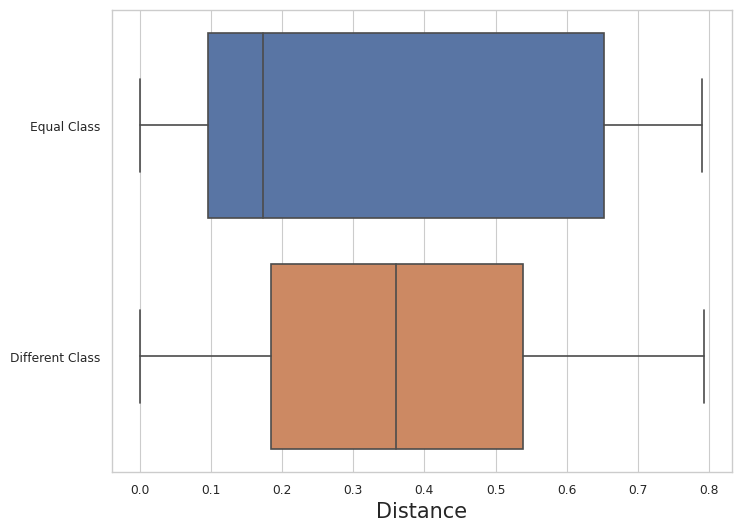

In [40]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})  
plt.figure(figsize=(8, 6))

eq_class = pd.Series(eq_class_js)
diff_class = pd.Series(diff_class_js)
combined_distances = pd.DataFrame({'Equal Class' : eq_class,
                                    'Different Class' : diff_class})

fig = sns.boxplot(data=combined_distances, orient='h')
fig.set_xlabel(f'Distance')